In [1]:
import pickle
from pathlib import Path
import glob, os, re, sys
sys.path.append('../')

import configparser
config = configparser.ConfigParser()
config.read('../../GalactISM/config_Forces.ini')

import numpy as np
from scipy.stats import binned_statistic_2d

import astro_helper as ah
import PRFM_helper as ph

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as patches
from matplotlib import rc
from matplotlib.ticker import LogLocator
from matplotlib.lines import Line2D
from matplotlib.colors import LogNorm
rc('axes', linewidth=1.5)
rc('axes', edgecolor='#3C3C3C')
plt.style.use('mpl_style_Jeffreson.mplstyle')

# Load the data

In [2]:
titles = ['ETG-lowM']

## PRFM, unresolved

In [3]:
# PRFM, unresolved files
dirs_prfm = [
    '/LtU/LOW-PRFM/'
]
files_prfm = []
for dir_prfm in dirs_prfm:
    files = glob.glob('/n/holystore01/LABS/itc_lab/Users/sjeffreson/'+dir_prfm+'/output/snap_*.hdf5')
    files = [x for _, x in sorted(zip([int(re.search(r'\d+', x).group()) for x in files], files))]
    files = files[5:]
    files_prfm.append(files)

In [4]:
tau_deps_prfm, SFRs_prfm = [], []
for files, title in zip(files_prfm, titles):
    print(title)
    tau_deps, SFRs = ph.collect_tau_deps(files)
    tau_deps_prfm.append(tau_deps)
    SFRs_prfm.append(SFRs)

ETG-lowM


AttributeError: module 'PRFM_helper' has no attribute 'collect_tau_deps'

In [6]:
tau_dyns_prfm = []
for files, title in zip(files_prfm, titles):
    print(title)
    tau_dyns = ph.collect_tau_dyns_prfm(files)
    tau_dyns_prfm.append(tau_dyns)

MW


## PRFM, resolved

In [7]:
# PRFM, resolved files
dirs_prfm_res = [
    '/LtU/LOW-PRFM_RSLVD/'
]
files_prfm_res = []
for dir_prfm_res in dirs_prfm_res:
    files = glob.glob('/n/holystore01/LABS/itc_lab/Users/sjeffreson/'+dir_prfm_res+'/output/snap_*.hdf5')
    files = [x for _, x in sorted(zip([int(re.search(r'\d+', x).group()) for x in files], files))]
    files = files[5:]
    files_prfm_res.append(files)

In [8]:
tau_deps_prfm_res, SFRs_prfm_res = [], []
for files, title in zip(files_prfm_res, titles):
    print(title)
    tau_deps, SFRs = ph.collect_tau_deps(files)
    tau_deps_prfm_res.append(tau_deps)
    SFRs_prfm_res.append(SFRs)

MW


In [9]:
tau_dyns_prfm_res = []
for files, title in zip(files_prfm_res, titles):
    print(title)
    tau_dyns = ph.collect_tau_dyns_prfm(files)
    tau_dyns_prfm_res.append(tau_dyns)

MW


## Springel & Hernquist 03

In [5]:
# SH03 files
dirs_SH03 = [
    '/LtU/LOW-SH03/'
]
files_SH03 = []
for dir_SH03 in dirs_SH03:
    files = glob.glob('/n/holystore01/LABS/itc_lab/Users/sjeffreson/'+dir_SH03+'/output/snap_*.hdf5')
    files = [x for _, x in sorted(zip([int(re.search(r'\d+', x).group()) for x in files], files))]
    files = files[5:]
    files_SH03.append(files)

In [8]:
tau_deps_SH03, SFRs_SH03 = [], []
for files, title in zip(files_SH03, titles):
    print(title)
    tau_deps, tau_dyns, SFRs, nHs, sigmaEffs, SigmaGases, SigmaStars, rhodms, Ptots = ph.collect_prfm_validation(files, diameter_kpc=4.)
    tau_deps_SH03.append(tau_deps)
    SFRs_SH03.append(SFRs)

ETG-lowM


KeyError: "Unable to synchronously open object (object 'Veldisp' doesn't exist)"

In [7]:
tau_dyns_SH03 = []
for files, title in zip(files_SH03, titles):
    print(title)
    tau_dyns = ph.collect_tau_dyns(files, mode='SH03')
    tau_dyns_SH03.append(tau_dyns)

ETG-lowM


# figure

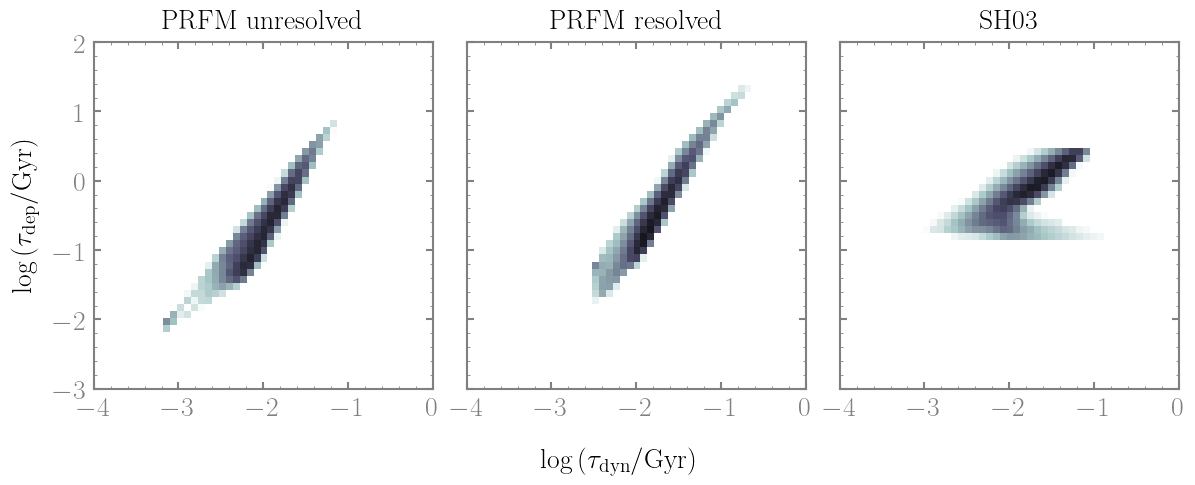

In [13]:
# 2D histogram of tau_dyn (x-axis) vs. tau_dep (y-axis) for PRFM and control (SH03) case,
# on two separate axes
fig, ax = plt.subplots(1, 3, figsize=(14, 4.5))

for ax_ in ax:
    ax_.tick_params(axis = 'both', bottom = True, top = True, left = True, right = True,
                   which = 'both', direction='in')
    ax_.minorticks_on()

# PRFM unresolved
tau_deps, tau_dyns, SFRs = tau_deps_prfm[0], tau_dyns_prfm[0], SFRs_prfm[0]
frac_SFR, _, _, _ = binned_statistic_2d(
    np.log10(tau_dyns/ah.Gyr_to_s), np.log10(tau_deps/ah.Gyr_to_s),
    SFRs, statistic='sum',
    bins=(np.linspace(-4., 0., 50), np.linspace(-3., 2., 50))
)
frac_SFR /= np.sum(frac_SFR)
ax[0].imshow(frac_SFR.T, origin='lower',
                 extent=(-4., 0., -3., 2.), aspect='auto',
                 cmap=plt.cm.bone_r, norm=LogNorm(vmin=1.e-4, vmax=1.e-1))
ax[0].set_title('PRFM unresolved', pad=10, fontsize=20)

# PRFM resolved
tau_deps, tau_dyns, SFRs = tau_deps_prfm_res[0], tau_dyns_prfm_res[0], SFRs_prfm_res[0]
frac_SFR, _, _, _ = binned_statistic_2d(
    np.log10(tau_dyns/ah.Gyr_to_s), np.log10(tau_deps/ah.Gyr_to_s),
    SFRs, statistic='sum',
    bins=(np.linspace(-4., 0., 50), np.linspace(-3., 2., 50))
)
frac_SFR /= np.sum(frac_SFR)
ax[1].imshow(frac_SFR.T, origin='lower',
                 extent=(-4., 0., -3., 2.), aspect='auto',
                 cmap=plt.cm.bone_r, norm=LogNorm(vmin=1.e-4, vmax=1.e-1))
ax[1].set_title('PRFM resolved', pad=10, fontsize=20)

# SH03
tau_deps, tau_dyns, SFRs = tau_deps_SH03[0], tau_dyns_SH03[0], SFRs_SH03[0]
frac_SFR, _, _, _ = binned_statistic_2d(
    np.log10(tau_dyns/ah.Gyr_to_s), np.log10(tau_deps/ah.Gyr_to_s),
    SFRs, statistic='sum',
    bins=(np.linspace(-4., 0., 50), np.linspace(-3., 2., 50))
)
frac_SFR /= np.sum(frac_SFR)
ax[2].imshow(frac_SFR.T, origin='lower',
                 extent=(-4., 0., -3., 2.), aspect='auto',
                 cmap=plt.cm.bone_r, norm=LogNorm(vmin=1.e-4, vmax=1.e-1))
ax[2].set_title('SH03', pad=10, fontsize=20)

# remove y-labels
for i in range(1, 3):
    ax[i].set_yticklabels([])

ax[0].set_ylabel(r'$\log{(\tau_{\rm dep}/{\rm Gyr})}$', color='k')
fig.text(0.5, -0.05, r'$\log{(\tau_{\rm dyn}/{\rm Gyr})}$', ha='center', va='center')

plt.subplots_adjust(hspace=0.1, wspace=0.1)

# plt.savefig(
#     '/n/holystore01/LABS/itc_lab/Users/sjeffreson/PRFM-unresolved/figs/ETG-vlM_prelim.pdf',
#     bbox_inches='tight',
#     format='pdf'
# )
plt.show()